## Imports

In [209]:
import numpy as np, pandas as pd
import pickle
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, fallalld, sisfall, classifiers, utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load and visualize datasets

In [210]:
farseeing_df = farseeing.load()
fallalld_df = fallalld.load()
sisfall_df = sisfall.load()

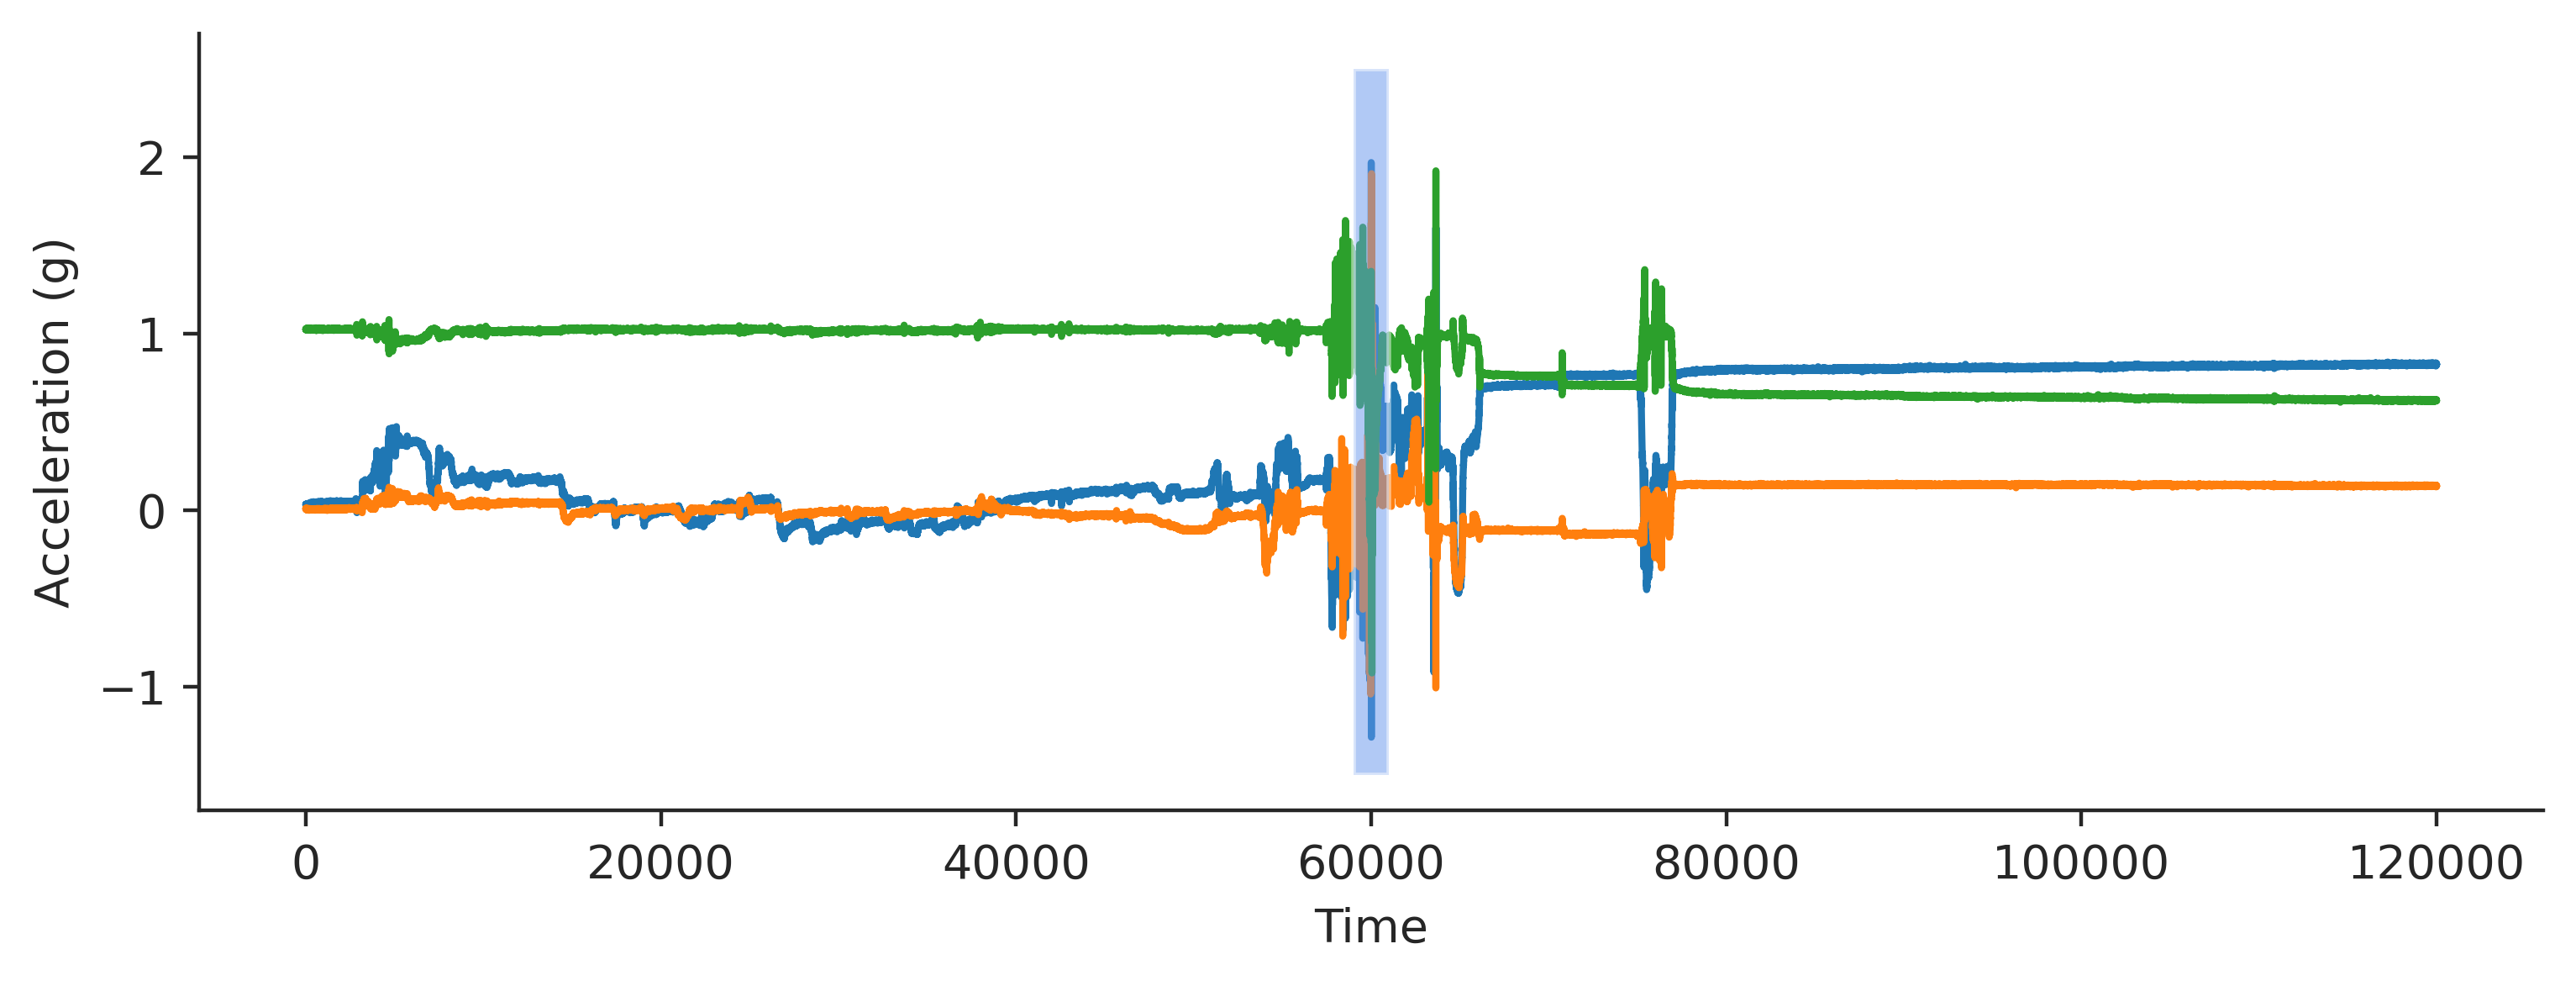

In [211]:
farseeing.plot_sample(farseeing_df)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


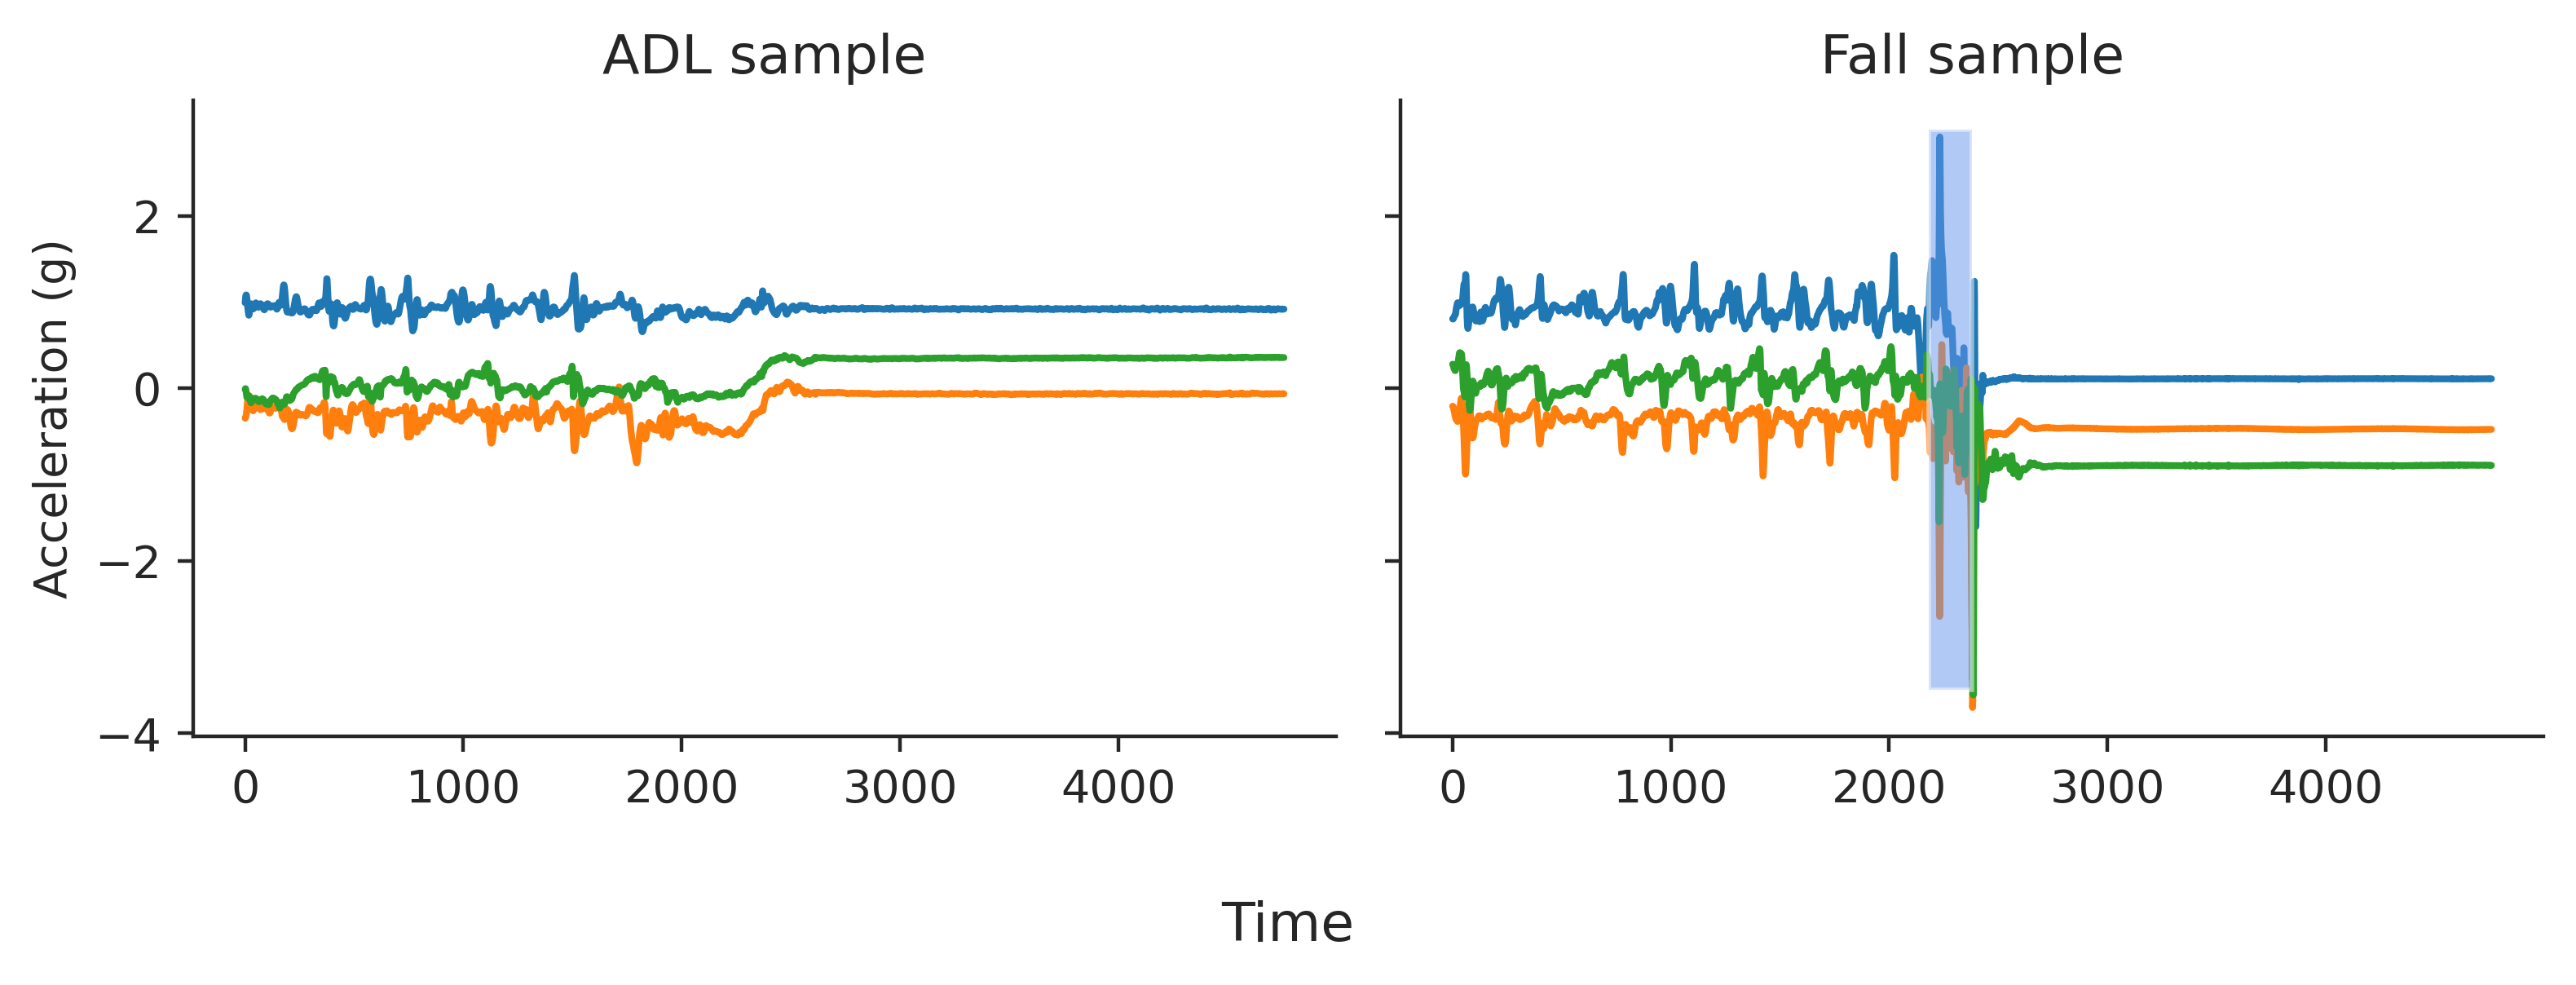

In [212]:
fallalld.plot_sample(fallalld_df)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


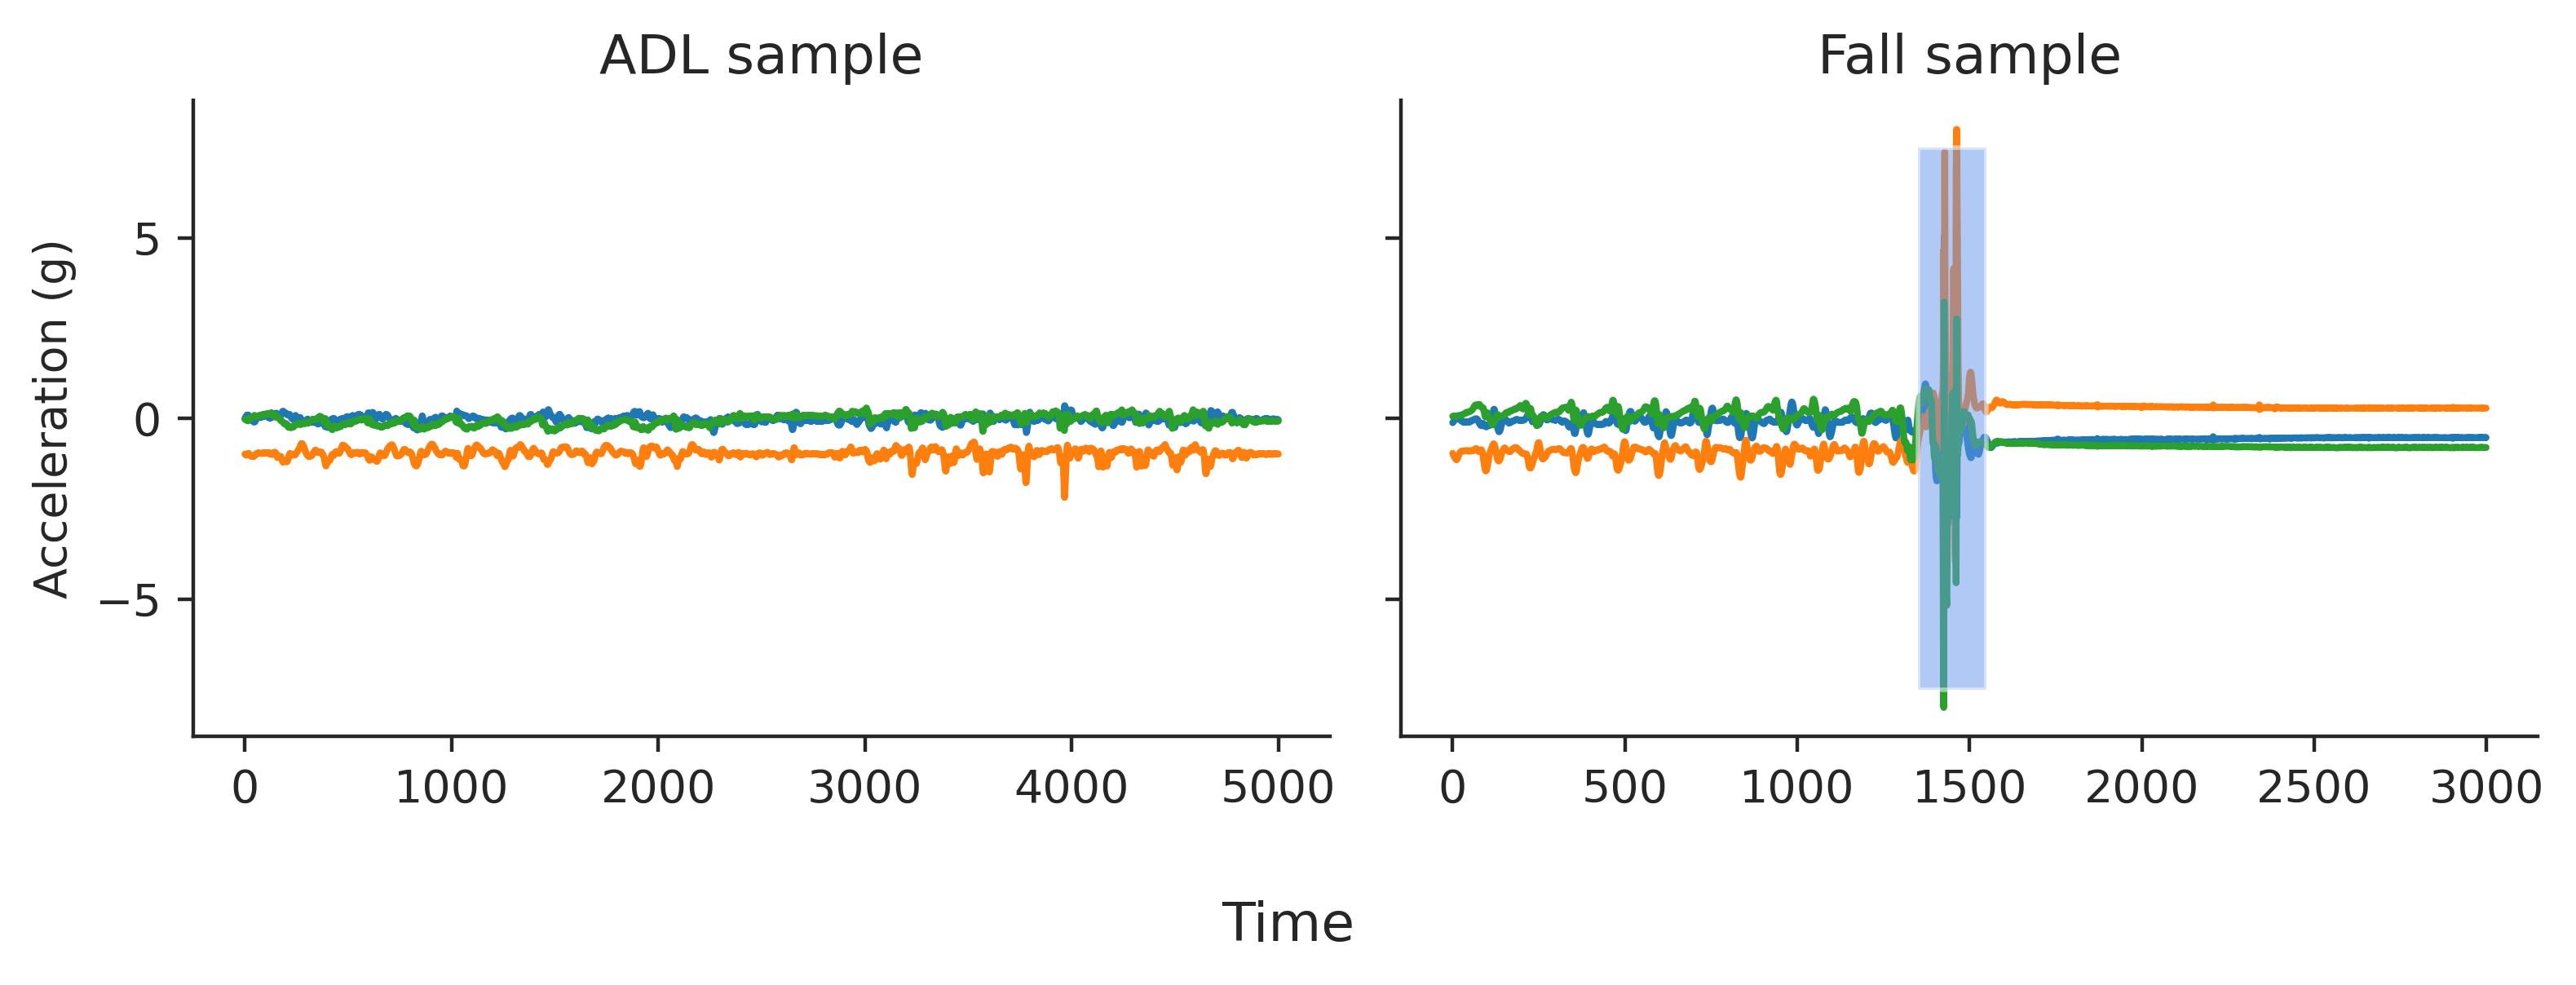

In [213]:
sisfall.plot_sample(sisfall_df)

## Baselines with Tabular Models

### FARSEEING Dataset

In [217]:
farseeing_cv_df, farseeing_aggr = classifiers.cross_validate(
  farseeing, df=farseeing_df, model_type='tabular')



-- fold 1 (8 subjects) --
Train set: X: (721, 700), y: (721,)            ([ADLs, Falls]) [610 111]
Test set: X: (593, 700), y: (593,)            ([ADLs, Falls]) [559  34]


0it [00:00, ?it/s]

preprocessing
preprocessing
preprocessing
preprocessing
preprocessing


-- fold 2 (8 subjects) --
Train set: X: (1065, 700), y: (1065,)            ([ADLs, Falls]) [966  99]
Test set: X: (249, 700), y: (249,)            ([ADLs, Falls]) [203  46]


0it [00:00, ?it/s]

preprocessing
preprocessing
preprocessing
preprocessing
preprocessing


-- fold 3 (8 subjects) --
Train set: X: (1221, 700), y: (1221,)            ([ADLs, Falls]) [1093  128]
Test set: X: (93, 700), y: (93,)            ([ADLs, Falls]) [76 17]


0it [00:00, ?it/s]

preprocessing
preprocessing
preprocessing
preprocessing
preprocessing


-- fold 4 (8 subjects) --
Train set: X: (1243, 700), y: (1243,)            ([ADLs, Falls]) [1116  127]
Test set: X: (71, 700), y: (71,)            ([ADLs, Falls]) [53 18]


0it [00:00, ?it/s]

preprocessing
preprocessing
preprocessing
preprocessing
preprocessing


-- fold 5 (8 subjects) --
Train set: X: (1007, 700), y: (1007,)            ([ADLs, Falls]) [891 116]
Test set: X: (307, 700), y: (307,)            ([ADLs, Falls]) [278  29]


0it [00:00, ?it/s]

preprocessing
preprocessing
preprocessing
preprocessing
preprocessing


In [218]:
farseeing_cv_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,fold
0,LogisticCV,7,0.0,94.0,75.86,64.71,98.75,69.84,0
1,RandomForest,7,0.0,99.0,59.62,91.18,96.24,72.09,0
2,KNN,7,0.0,77.0,44.74,50.00,96.24,47.22,0
3,RidgeCV,7,0.0,95.0,88.46,67.65,99.46,76.67,0
4,ExtraTrees,7,0.0,99.0,64.29,79.41,97.32,71.05,0
5,LogisticCV,7,0.0,94.0,94.59,76.09,99.01,84.34,1
6,RandomForest,7,0.0,99.0,94.59,76.09,99.01,84.34,1
7,KNN,7,0.0,79.0,100.00,17.39,100.00,29.63,1
8,RidgeCV,7,0.0,97.0,100.00,65.22,100.00,78.95,1
9,ExtraTrees,7,0.0,99.0,100.00,84.78,100.00,91.76,1


In [89]:
farseeing_cv_df

,model,window_size,runtime,precision,recall,f1-score,fold
0,LogisticCV,7,16.59,0.94,0.70,0.80,0
1,RandomForest,7,1.09,0.79,0.67,0.73,0
2,KNN,7,0.05,0.71,0.30,0.42,0
3,RidgeCV,7,0.19,0.98,0.73,0.84,0
4,ExtraTrees,7,0.34,0.86,0.72,0.78,0
5,LogisticCV,7,0.59,0.89,0.83,0.86,1
6,RandomForest,7,2.70,0.97,0.97,0.97,1
7,KNN,7,0.03,0.78,0.48,0.60,1
8,RidgeCV,7,0.21,1.00,0.76,0.86,1
9,ExtraTrees,7,0.36,1.00,0.97,0.98,1


### FallAllD Dataset

In [90]:
fallalld_cv_df, fallalld_aggr = classifiers.cross_validate(
  fallalld, df=fallalld_df, model_type='tabular')



-- fold 1 (2 subjects) --
Train set: X: (1425, 1666), y: (1425,)            ([ADLs, Falls]) [1062  363]
Test set: X: (320, 1666), y: (320,)            ([ADLs, Falls]) [217 103]
LogisticCV (17.29s). RandomForest (3.99s). KNN (0.12s). RidgeCV (0.78s). ExtraTrees (0.36s). 

-- fold 2 (2 subjects) --
Train set: X: (1522, 1666), y: (1522,)            ([ADLs, Falls]) [1090  432]
Test set: X: (223, 1666), y: (223,)            ([ADLs, Falls]) [189  34]
LogisticCV (1.46s). RandomForest (4.09s). KNN (0.1s). RidgeCV (0.99s). ExtraTrees (0.33s). 

-- fold 3 (2 subjects) --
Train set: X: (1460, 1666), y: (1460,)            ([ADLs, Falls]) [1077  383]
Test set: X: (285, 1666), y: (285,)            ([ADLs, Falls]) [202  83]
LogisticCV (1.32s). RandomForest (3.85s). KNN (0.1s). RidgeCV (0.73s). ExtraTrees (0.36s). 

-- fold 4 (2 subjects) --
Train set: X: (1535, 1666), y: (1535,)            ([ADLs, Falls]) [1100  435]
Test set: X: (210, 1666), y: (210,)            ([ADLs, Falls]) [179  31]
LogisticC

In [91]:
fallalld_cv_df

,model,window_size,runtime,precision,recall,f1-score,fold
0,LogisticCV,7,17.29,0.98,0.63,0.77,0
1,RandomForest,7,3.99,0.99,0.72,0.83,0
2,KNN,7,0.12,0.62,0.10,0.17,0
3,RidgeCV,7,0.78,0.98,0.53,0.69,0
4,ExtraTrees,7,0.36,0.99,0.76,0.86,0
5,LogisticCV,7,1.46,0.79,0.65,0.71,1
6,RandomForest,7,4.09,0.82,0.79,0.81,1
7,KNN,7,0.10,0.67,0.12,0.20,1
8,RidgeCV,7,0.99,0.83,0.44,0.58,1
9,ExtraTrees,7,0.33,0.84,0.79,0.82,1


### SisFall Dataset

In [92]:
sisfall_cv_df, sisfall_aggr = classifiers.cross_validate(
  sisfall, df=sisfall_df, model_type='tabular')



-- fold 1 (7 subjects) --
Train set: X: (9682, 1400), y: (9682,)            ([ADLs, Falls]) [8848  834]
Test set: X: (2361, 1400), y: (2361,)            ([ADLs, Falls]) [1995  366]
LogisticCV 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(12.24s). RandomForest (43.84s). KNN (0.88s). RidgeCV (1.58s). ExtraTrees (0.85s). 

-- fold 2 (7 subjects) --
Train set: X: (9563, 1400), y: (9563,)            ([ADLs, Falls]) [8753  810]
Test set: X: (2480, 1400), y: (2480,)            ([ADLs, Falls]) [2090  390]
LogisticCV (14.84s). RandomForest (42.99s). KNN (0.88s). RidgeCV (1.66s). ExtraTrees (0.84s). 

-- fold 3 (7 subjects) --
Train set: X: (9894, 1400), y: (9894,)            ([ADLs, Falls]) [9008  886]
Test set: X: (2149, 1400), y: (2149,)            ([ADLs, Falls]) [1835  314]
LogisticCV (32.98s). RandomForest (43.09s). KNN (0.88s). RidgeCV (1.58s). ExtraTrees (0.82s). 

-- fold 4 (7 subjects) --
Train set: X: (9941, 1400), y: (9941,)            ([ADLs, Falls]) [8827 1114]
Test set: X: (2102, 1400), y: (2102,)            ([ADLs, Falls]) [2016   86]
LogisticCV (15.27s). RandomForest (47.71s). KNN (0.73s). RidgeCV (1.59s). ExtraTrees (0.83s). 

-- fold 5 (7 subjects) --
Train set: X: (9836, 1400), y: (9836,)            ([ADLs, 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(12.95s). RandomForest 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(47.46s). KNN 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.72s). RidgeCV 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(1.56s). ExtraTrees (0.83s). 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Summary Visualization

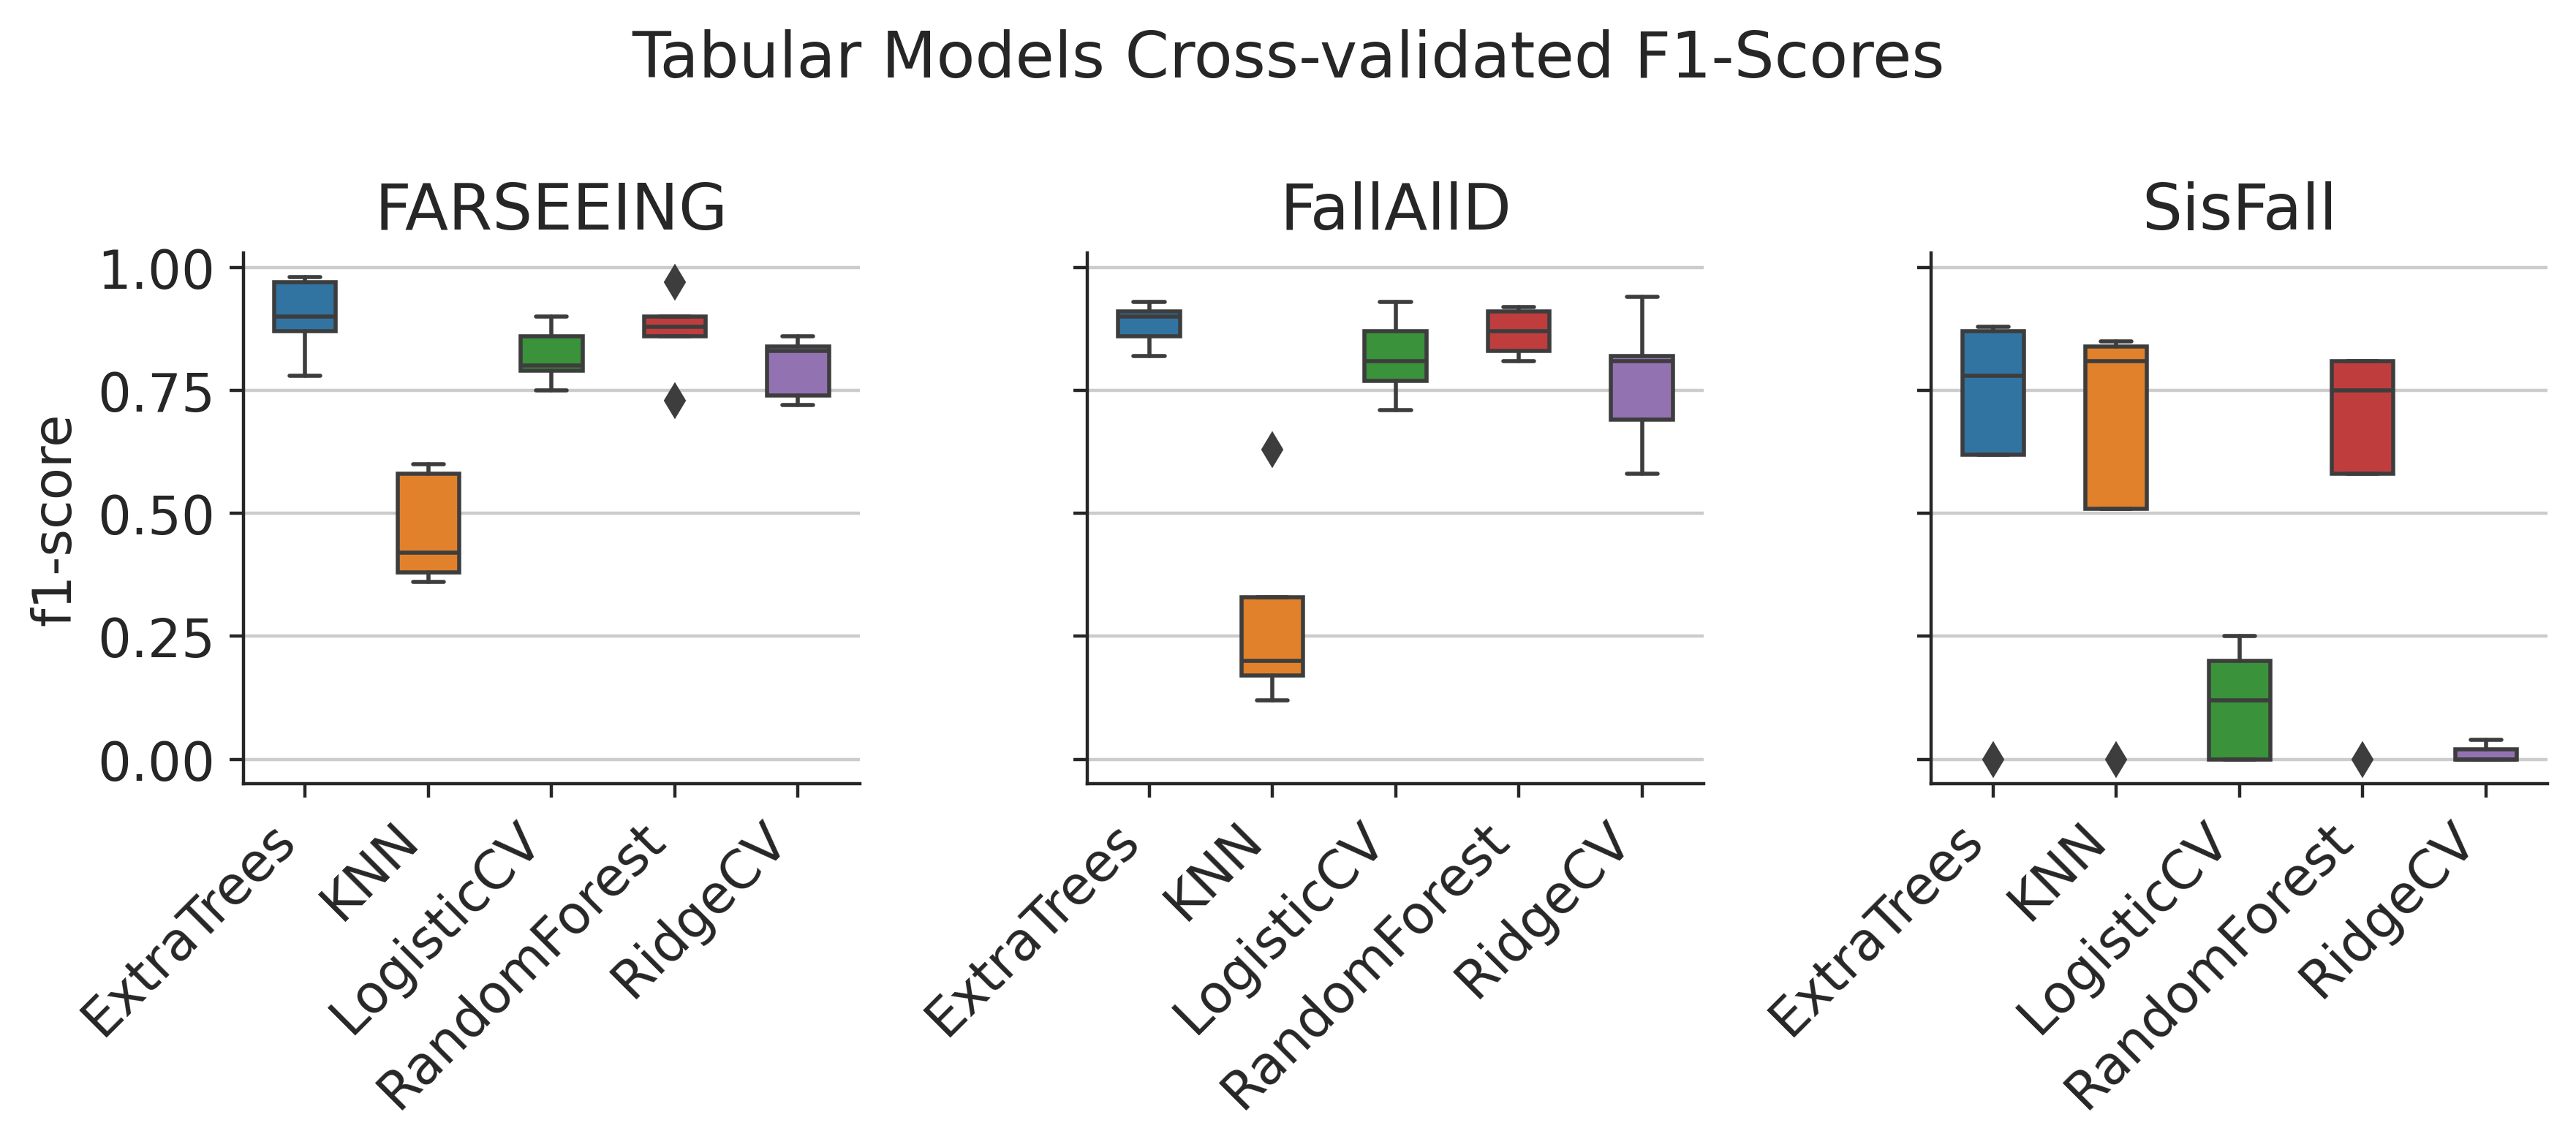

In [138]:
dataset_names = ['FARSEEING', 'FallAllD', 'SisFall']
plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(1,3, figsize=(9, 4), dpi=400,
                        sharey=True, layout='tight')
for d, df in enumerate([farseeing_cv_df, fallalld_cv_df, sisfall_cv_df]):
    df.sort_values(by='model', inplace=True)
    sns.boxplot(data=df, x='model', y='f1-score', width=0.5, ax=axs[d],
                linewidth=1)
    axs[d].grid(axis='y')
    axs[d].set_title(dataset_names[d])
    axs[d].set_xlabel('')
    if d != 0:
        axs[d].set_ylabel('')
    plt.setp(axs[d].get_xticklabels(), rotation=45, ha='right')
fig.suptitle('Tabular Models Cross-validated F1-Scores')
sns.despine()
plt.savefig('figs/tabular_boxplot.eps', format='eps', bbox_inches='tight')
plt.show()

## Classification with Time Series Models

### FARSEEING Dataset

In [140]:
farseeing_cv_df_ts, farseeing_aggr_ts = classifiers.cross_validate(
  farseeing, df=farseeing_df, model_type='ts')



-- fold 1 (8 subjects) --
Train set: X: (643, 700), y: (643,)            ([ADLs, Falls]) [565  78]
Test set: X: (671, 700), y: (671,)            ([ADLs, Falls]) [604  67]
Hydra (5.8s). Rocket (2.28s). MultiRocketHydra (8.66s). Catch22 (3.39s). QUANT (3.59s). 

-- fold 2 (8 subjects) --
Train set: X: (1178, 700), y: (1178,)            ([ADLs, Falls]) [1062  116]
Test set: X: (136, 700), y: (136,)            ([ADLs, Falls]) [107  29]
Hydra (5.94s). Rocket (2.66s). MultiRocketHydra (9.04s). Catch22 (5.04s). QUANT (5.45s). 

-- fold 3 (8 subjects) --
Train set: X: (1256, 700), y: (1256,)            ([ADLs, Falls]) [1128  128]
Test set: X: (58, 700), y: (58,)            ([ADLs, Falls]) [41 17]
Hydra (6.61s). Rocket (3.06s). MultiRocketHydra (9.72s). Catch22 (4.2s). QUANT (5.68s). 

-- fold 4 (8 subjects) --
Train set: X: (1018, 700), y: (1018,)            ([ADLs, Falls]) [890 128]
Test set: X: (296, 700), y: (296,)            ([ADLs, Falls]) [279  17]
Hydra (5.66s). Rocket (2.64s). MultiR

In [143]:
farseeing_cv_df_ts

,model,window_size,runtime,precision,recall,f1-score,fold
0,Hydra,7,5.80,0.93,0.84,0.88,0
1,Rocket,7,2.28,0.91,0.73,0.81,0
2,MultiRocketHydra,7,8.66,0.95,0.84,0.89,0
3,Catch22,7,3.39,0.91,0.72,0.80,0
4,QUANT,7,3.59,0.96,0.79,0.87,0
5,Hydra,7,5.94,0.72,0.97,0.82,1
6,Rocket,7,2.66,0.83,0.86,0.85,1
7,MultiRocketHydra,7,9.04,0.93,0.93,0.93,1
8,Catch22,7,5.04,0.84,0.93,0.89,1
9,QUANT,7,5.45,0.88,1.00,0.94,1


### FallAllD Dataset

In [144]:
fallalld_cv_df_ts, fallalld_aggr_ts = classifiers.cross_validate(
  fallalld, df=fallalld_df, model_type='ts')



-- fold 1 (2 subjects) --
Train set: X: (1425, 1666), y: (1425,)            ([ADLs, Falls]) [1062  363]
Test set: X: (320, 1666), y: (320,)            ([ADLs, Falls]) [217 103]
Hydra (22.58s). Rocket (6.5s). MultiRocketHydra (27.26s). Catch22 (8.41s). QUANT (18.8s). 

-- fold 2 (2 subjects) --
Train set: X: (1522, 1666), y: (1522,)            ([ADLs, Falls]) [1090  432]
Test set: X: (223, 1666), y: (223,)            ([ADLs, Falls]) [189  34]
Hydra (22.77s). Rocket (6.5s). MultiRocketHydra (27.34s). Catch22 (9.58s). QUANT (20.02s). 

-- fold 3 (2 subjects) --
Train set: X: (1460, 1666), y: (1460,)            ([ADLs, Falls]) [1077  383]
Test set: X: (285, 1666), y: (285,)            ([ADLs, Falls]) [202  83]
Hydra (22.75s). Rocket (6.51s). MultiRocketHydra (27.66s). Catch22 (12.37s). QUANT (18.61s). 

-- fold 4 (2 subjects) --
Train set: X: (1535, 1666), y: (1535,)            ([ADLs, Falls]) [1100  435]
Test set: X: (210, 1666), y: (210,)            ([ADLs, Falls]) [179  31]
Hydra (22.

In [145]:
fallalld_cv_df_ts

,model,window_size,runtime,precision,recall,f1-score,fold
0,Hydra,7,22.58,0.98,0.84,0.91,0
1,Rocket,7,6.50,0.98,0.83,0.89,0
2,MultiRocketHydra,7,27.26,0.98,0.88,0.93,0
3,Catch22,7,8.41,0.96,0.80,0.87,0
4,QUANT,7,18.80,0.97,0.85,0.91,0
5,Hydra,7,22.77,0.93,0.74,0.82,1
6,Rocket,7,6.50,0.96,0.74,0.83,1
7,MultiRocketHydra,7,27.34,0.94,0.88,0.91,1
8,Catch22,7,9.58,0.83,0.88,0.86,1
9,QUANT,7,20.02,0.94,0.88,0.91,1


### SisFall Dataset

In [147]:
sisfall_cv_df_ts, sisfall_aggr_ts = classifiers.cross_validate(
  sisfall, df=sisfall_df, model_type='ts')



-- fold 1 (7 subjects) --
Train set: X: (9682, 1400), y: (9682,)            ([ADLs, Falls]) [8848  834]
Test set: X: (2361, 1400), y: (2361,)            ([ADLs, Falls]) [1995  366]
Hydra (131.0s). Rocket (75.33s). MultiRocketHydra (178.16s). Catch22 (87.44s). QUANT (121.83s). 

-- fold 2 (7 subjects) --
Train set: X: (9563, 1400), y: (9563,)            ([ADLs, Falls]) [8753  810]
Test set: X: (2480, 1400), y: (2480,)            ([ADLs, Falls]) [2090  390]
Hydra (131.3s). Rocket (73.43s). MultiRocketHydra (175.6s). Catch22 (85.36s). QUANT (140.89s). 

-- fold 3 (7 subjects) --
Train set: X: (9894, 1400), y: (9894,)            ([ADLs, Falls]) [9008  886]
Test set: X: (2149, 1400), y: (2149,)            ([ADLs, Falls]) [1835  314]
Hydra (132.1s). Rocket (77.73s). MultiRocketHydra (181.29s). Catch22 (86.45s). QUANT (148.04s). 

-- fold 4 (7 subjects) --
Train set: X: (9941, 1400), y: (9941,)            ([ADLs, Falls]) [8827 1114]
Test set: X: (2102, 1400), y: (2102,)            ([ADLs, F

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(133.41s). Rocket 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(82.12s). MultiRocketHydra 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(184.46s). Catch22 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(87.73s). QUANT (151.35s). 

/mnt/storage/timiderinola/miniconda3/envs/msca/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Summary for TS and Tabular on all Datasets

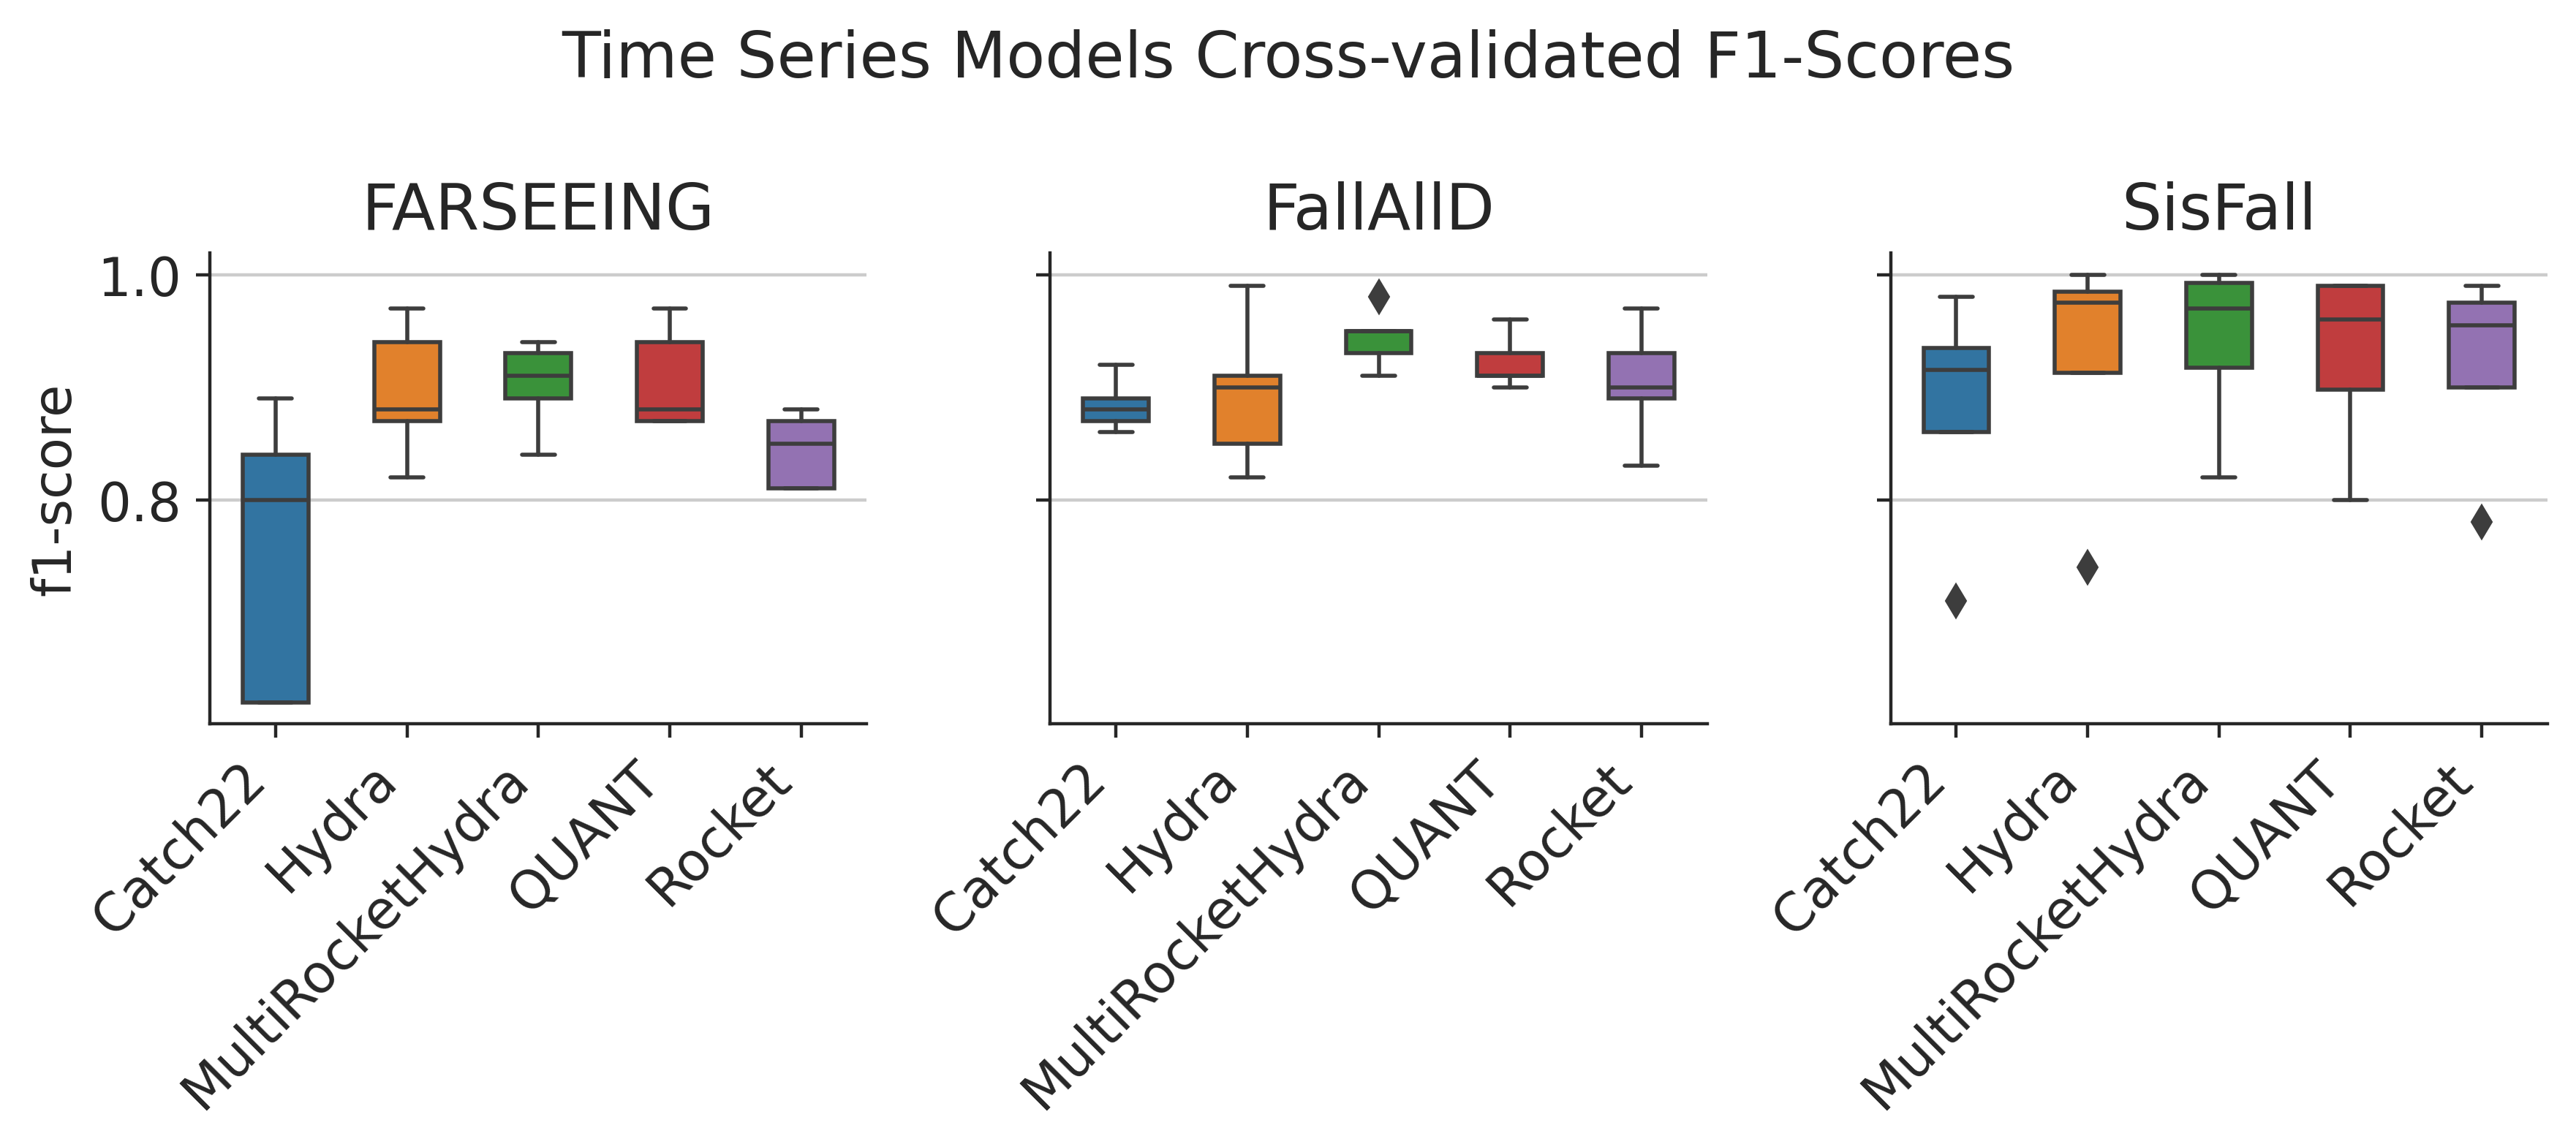

In [217]:
dataset_names = ['FARSEEING', 'FallAllD', 'SisFall']
plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(1,3, figsize=(9, 4), dpi=400,
                        sharey=True, layout='tight')
for d, df in enumerate([farseeing_cv_df_ts, fallalld_cv_df_ts,
                        sisfall_cv_df_ts.drop(sisfall_cv_df_ts[sisfall_cv_df_ts['f1-score']==0].index)]):
    df.sort_values(by='model', inplace=True)
    sns.boxplot(data=df, x='model', y='f1-score', width=0.5, ax=axs[d],
                linewidth=1)
    axs[d].grid(axis='y')
    axs[d].set_title(dataset_names[d])
    axs[d].set_xlabel('')
    if d != 0:
        axs[d].set_ylabel('')
    plt.setp(axs[d].get_xticklabels(), rotation=45, ha='right')
fig.suptitle('Time Series Models Cross-validated F1-Scores')
sns.despine()
plt.savefig('figs/ts_boxplot.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


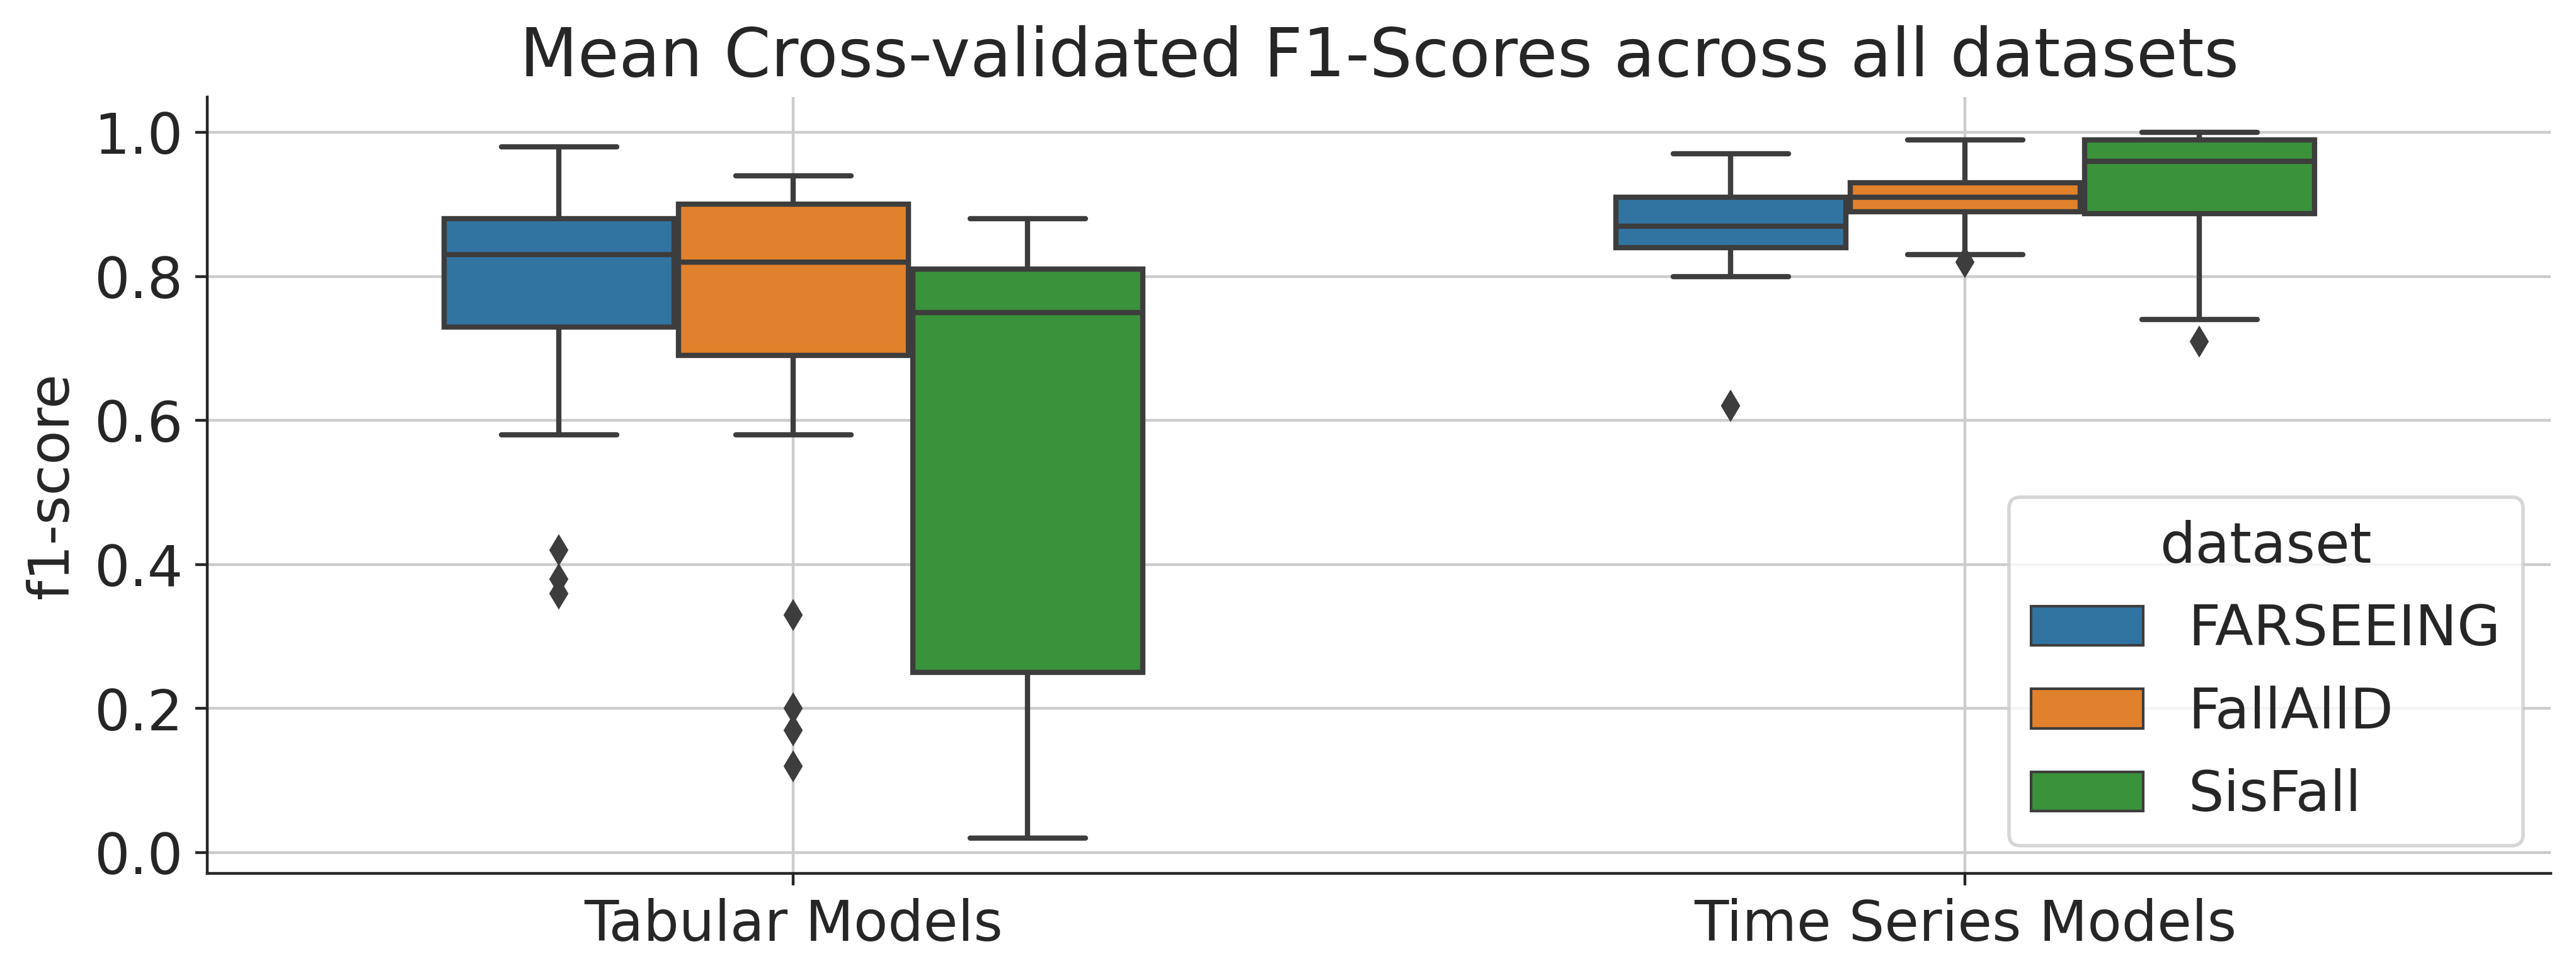

In [203]:
dataset_names = ['FARSEEING', 'FallAllD', 'SisFall']
# add dataset names to each df
# concatenate all results for each dataset

farseeing_all_df = pd.concat([df.assign(
    dataset=dataset_names[0]) for df in [farseeing_cv_df.assign(type='Tabular Models'),
    farseeing_cv_df_ts.assign(type='Time Series Models')]],
    ignore_index=True)
fallalld_all_df = pd.concat([df.assign(
    dataset=dataset_names[1]) for df in [fallalld_cv_df.assign(type='Tabular Models'),
    fallalld_cv_df_ts.assign(type='Time Series Models')]],
    ignore_index=True)
sisfall_all_df = pd.concat([df.assign(
    dataset=dataset_names[2]) for df in [sisfall_cv_df.assign(type='Tabular Models'),
    sisfall_cv_df_ts.assign(type='Time Series Models')]],
    ignore_index=True)
all_results_df = pd.concat([farseeing_all_df, fallalld_all_df, sisfall_all_df], ignore_index=True)
all_results_df.to_csv('results/all_results.csv')
all_results_df.drop(all_results_df[all_results_df['f1-score']==0].index, inplace=True)
plt.figure(figsize=(12, 4), dpi=400)
plt.rcParams.update({'font.size': 16})
sns.boxplot(data=all_results_df, x='type', y='f1-score', hue='dataset', width=0.6)
# plt.xticks(rotation=45, ha='right')
plt.grid()
plt.xlabel('')
plt.title('Mean Cross-validated F1-Scores across all datasets')
sns.despine()
plt.savefig('figs/ts_vs_tabular_boxplot.eps', format='eps', bbox_inches='tight')
plt.show()

## Cross-Dataset Evaluation
Train on simulated data and test on FARSEEING.
- Resample the datasets
- Clip all to  be within (-2g/2g)

### FallAllD <-> FARSEEING

In [101]:
fallalld_farseeing = classifiers.cross_dataset_eval(fallalld, farseeing)

<----- FallAllD > FARSEEING ----->


  0%|          | 0/5 [00:00<?, ?it/s]

<----- FARSEEING > FallAllD ----->


  0%|          | 0/5 [00:00<?, ?it/s]

<----- FallAllD + FARSEEING ----->


  0%|          | 0/5 [00:00<?, ?it/s]

In [102]:
fallalld_farseeing

,model,window_size,runtime,precision,recall,f1-score,scenario
0,Hydra,7,8.0,0.62,0.60,0.61,FallAllD>FARSEEING
1,Rocket,7,2.0,0.54,0.57,0.55,FallAllD>FARSEEING
2,MultiRocketHydra,7,10.0,0.68,0.69,0.69,FallAllD>FARSEEING
3,Catch22,7,7.0,0.53,0.77,0.63,FallAllD>FARSEEING
4,QUANT,7,1.0,0.78,0.68,0.73,FallAllD>FARSEEING
5,Hydra,7,7.0,0.39,0.62,0.48,FARSEEING>FallAllD
6,Rocket,7,2.0,0.40,0.74,0.52,FARSEEING>FallAllD
7,MultiRocketHydra,7,9.0,0.37,0.69,0.48,FARSEEING>FallAllD
8,Catch22,7,7.0,0.53,0.74,0.62,FARSEEING>FallAllD
9,QUANT,7,1.0,0.53,0.84,0.65,FARSEEING>FallAllD


### SisFall <-> FARSEEING

In [104]:
sisfall_farseeing = classifiers.cross_dataset_eval(sisfall, farseeing)

<----- SisFall > FARSEEING ----->


  0%|          | 0/5 [00:00<?, ?it/s]

<----- FARSEEING > SisFall ----->


  0%|          | 0/5 [00:00<?, ?it/s]

<----- SisFall + FARSEEING ----->


  0%|          | 0/5 [00:00<?, ?it/s]

In [105]:
sisfall_farseeing

,model,window_size,runtime,precision,recall,f1-score,scenario
0,Hydra,7,25.0,0.21,0.60,0.31,SisFall>FARSEEING
1,Rocket,7,8.0,0.25,0.86,0.39,SisFall>FARSEEING
2,MultiRocketHydra,7,31.0,0.14,0.68,0.23,SisFall>FARSEEING
3,Catch22,7,16.0,0.16,0.87,0.26,SisFall>FARSEEING
4,QUANT,7,4.0,0.12,0.77,0.21,SisFall>FARSEEING
5,Hydra,7,5.0,0.04,0.20,0.07,FARSEEING>SisFall
6,Rocket,7,1.0,0.48,0.13,0.20,FARSEEING>SisFall
7,MultiRocketHydra,7,6.0,0.05,0.28,0.09,FARSEEING>SisFall
8,Catch22,7,5.0,0.33,0.12,0.18,FARSEEING>SisFall
9,QUANT,7,1.0,0.07,0.22,0.10,FARSEEING>SisFall


In [143]:
simulated_farseeing.drop(columns=['runtime', 'window_size']).melt(id_vars=["scenario", "model"])

,scenario,model,variable,value
0,FallAllD>FARSEEING,Hydra,precision,0.62
1,FallAllD>FARSEEING,Rocket,precision,0.54
2,FallAllD>FARSEEING,MultiRocketHydra,precision,0.68
3,FallAllD>FARSEEING,Catch22,precision,0.53
4,FallAllD>FARSEEING,QUANT,precision,0.78
...,...,...,...,...
85,SisFall+FARSEEING,Hydra,f1-score,0.96
86,SisFall+FARSEEING,Rocket,f1-score,0.98
87,SisFall+FARSEEING,MultiRocketHydra,f1-score,0.98
88,SisFall+FARSEEING,Catch22,f1-score,0.94


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


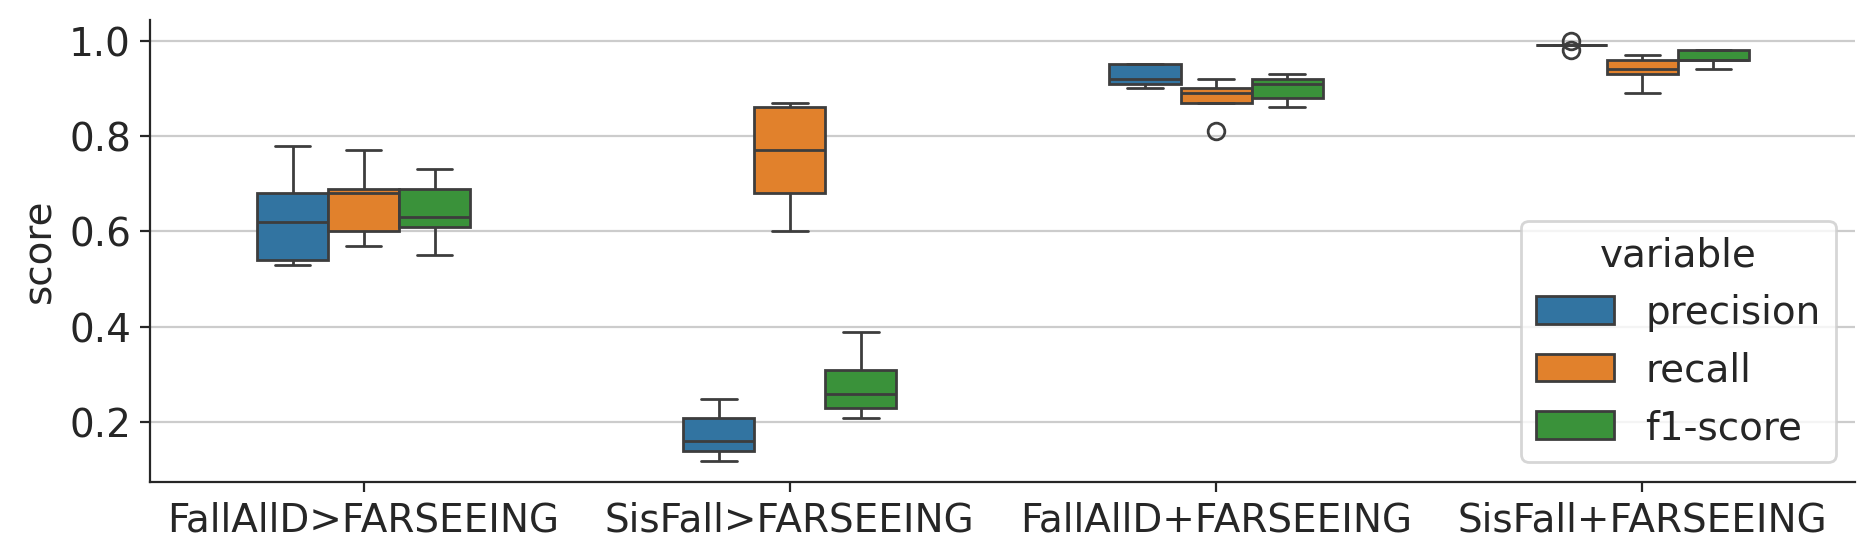

In [236]:
simulated_farseeing = pd.concat([fallalld_farseeing,
                                 sisfall_farseeing],
                                 ignore_index=True)
plt.rcParams.update({'font.size': 14})
melted = simulated_farseeing.drop(columns=['runtime', 'window_size']).melt(id_vars=["scenario", "model"])

melted.drop(melted[melted['scenario']=='FARSEEING>FallAllD'].index, inplace=True)
melted.drop(melted[melted['scenario']=='FARSEEING>SisFall'].index, inplace=True)
plt.figure(figsize=(11, 3), dpi=200)

order=['FallAllD>FARSEEING', 'SisFall>FARSEEING',
       'FallAllD+FARSEEING','SisFall+FARSEEING']
sns.boxplot(melted, x='scenario', y='value', hue='variable', width=0.5, palette="tab10", order=order)
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('score')
sns.despine()
plt.savefig('figs/cross_dataset_2.eps', format='eps', bbox_inches='tight')
plt.show()

## Temporal Attribution Scores

Load data and train model first

In [15]:
X_train, X_test, y_train, y_test = utils.train_test_subjects_split(farseeing)

Train set: X: (1173, 700), y: (1173,)        ([ADLs, Falls]) [1062  111]
Test set: X: (141, 700), y: (141,)        ([ADLs, Falls]) [107  34]


0it [00:00, ?it/s]

Hydra AUC: 0.96
Rocket AUC: 0.9
MultiRocketHydra AUC: 0.95
Catch22 AUC: 0.95
QUANT AUC: 1.0


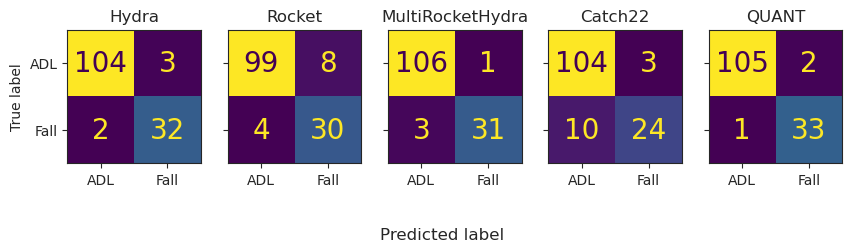

In [16]:
dfs, models = classifiers.run_models(
    X_train, y_train, X_test, y_test,freq=100,type='ts',verbose=3)

In [17]:
dfs

,model,window_size,runtime,precision,recall,f1-score
0,Hydra,7,22.0,0.91,0.94,0.93
1,Rocket,7,8.0,0.79,0.88,0.83
2,MultiRocketHydra,7,30.0,0.97,0.91,0.94
3,Catch22,7,16.0,0.89,0.71,0.79
4,QUANT,7,7.0,0.94,0.97,0.96


Get temporal attributions

In [31]:
samples_and_attributions_dict = {}
for model_name, clf in models.items():
    print(model_name)
    samples_and_attributions_dict[model_name] = classifiers.get_sample_attributions(
        clf, X_test, y_test, normalise='Hydra' not in model_name)

Hydra


8it [00:07,  1.11it/s]               
8it [00:23,  2.89s/it]               
8it [00:46,  5.83s/it]               
8it [00:39,  4.98s/it]               


Rocket


8it [00:47,  5.95s/it]               
8it [00:49,  6.13s/it]               
8it [00:49,  6.17s/it]               
8it [00:49,  6.13s/it]               


MultiRocketHydra


8it [02:19, 17.38s/it]               


Found 1 sample. Doubling it to avoid errors


8it [02:10, 16.32s/it]               
8it [02:15, 16.88s/it]               
8it [02:14, 16.78s/it]               


Catch22


8it [00:23,  2.98s/it]               
8it [00:23,  2.90s/it]               
8it [00:23,  2.94s/it]               
8it [00:24,  3.05s/it]               


QUANT


8it [00:36,  4.51s/it]               
8it [00:35,  4.50s/it]               
8it [00:35,  4.49s/it]               


Found 1 sample. Doubling it to avoid errors


8it [00:35,  4.48s/it]               


In [39]:
# with open('results/samples_and_attributions_dict.pkl', 'wb') as file:
#     pickle.dump(samples_and_attributions_dict, file)
# with open('results/samples_and_attributions_dict.pkl', 'rb') as file:
#     samples_and_attributions_dict=pickle.load(file)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


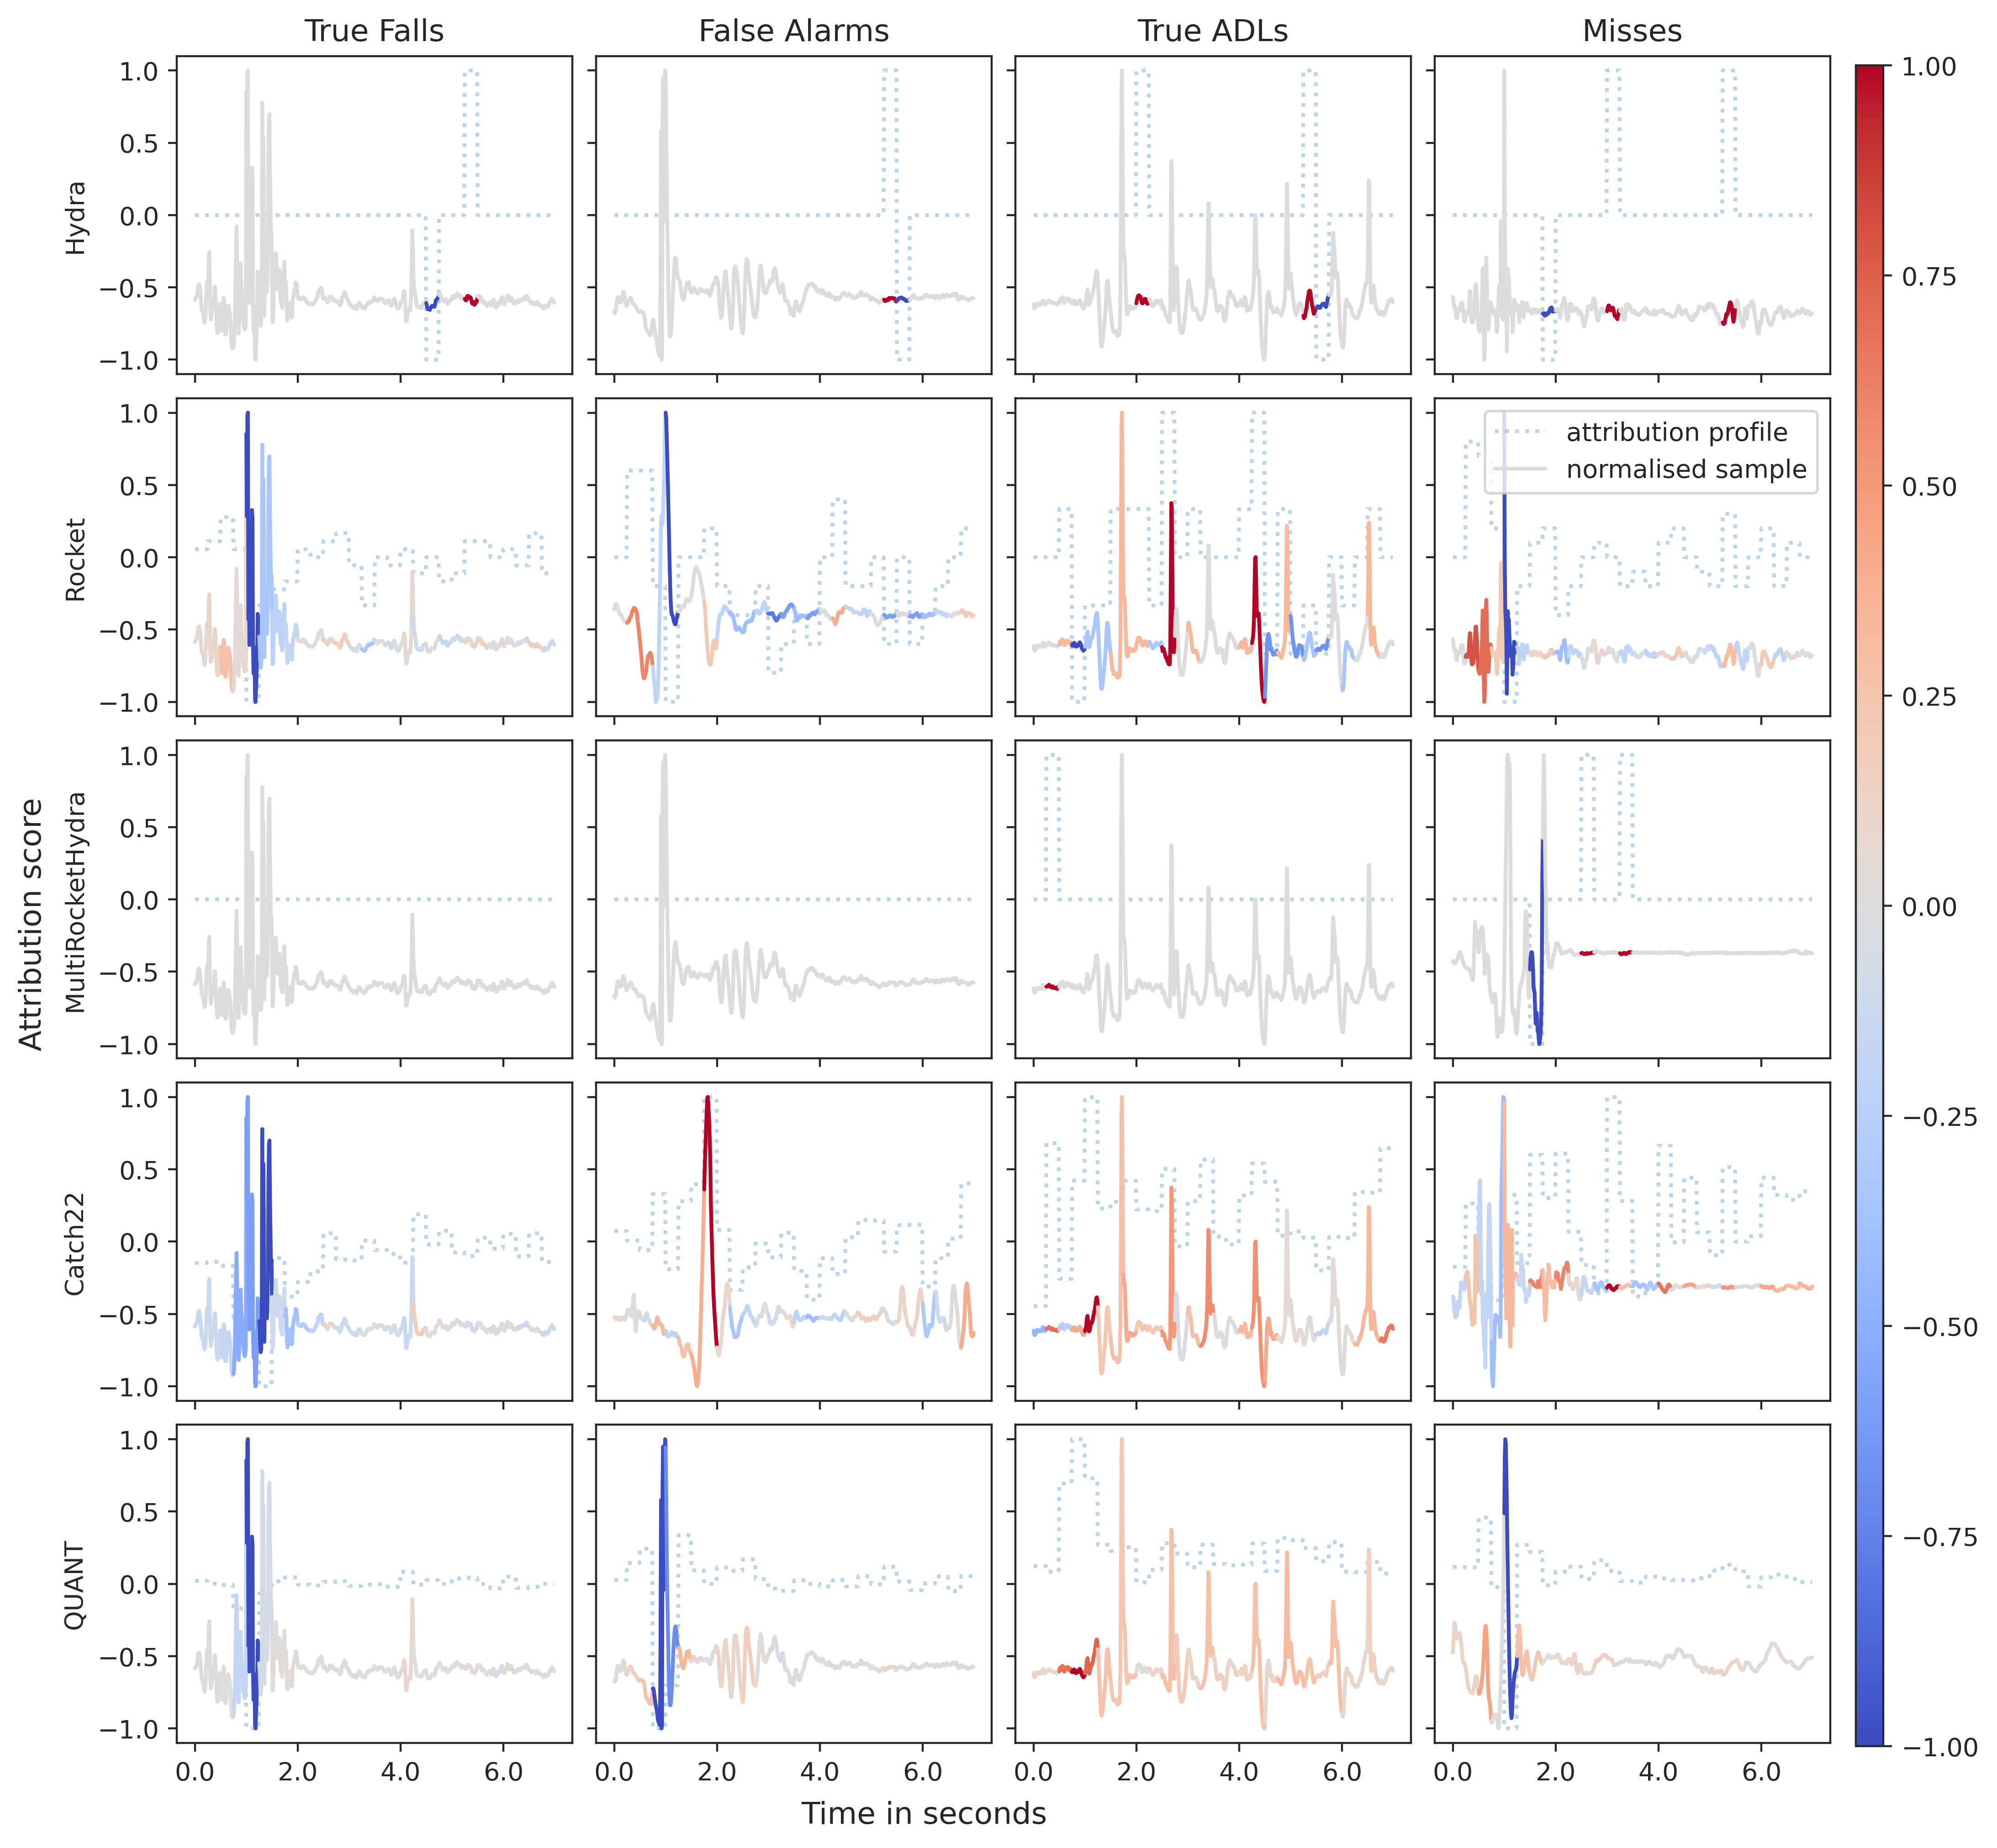

In [101]:
classifiers.plot_sample_with_attributions(samples_and_attributions_dict)